In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

df = pd.read_csv('./data/train.csv')

df_nan_bad = df.loc[df.bad.isna()]

df_notnan_bad = df.drop(index=df_nan_bad.index)

cols = list(set(df.columns) - set(['bad', 'approved']))
print(cols)
df_notnan_bad.head(10)

['work_code', 'all_creds_count_all', 'delay_more_sum_all', 'mfo_cred_mean_sum_3lm', 'all_closed_creds_sum_ly', 'cred_sum_cc_ly', 'region', 'cred_max_overdue_max_ly', 'cred_sum_cc_all', 'mfo_last_days_all', 'order_id', 'all_closed_creds_sum_all', 'all_active_creds_sum_all', 'cred_max_overdue_max_3lm', 'cred_day_overdue_all_sum_all', 'cred_sum_overdue_cc_all', 'cred_sum_debt_all_all', 'mfo_closed_count_ly', 'bank_inqs_count_quarter', 'mfo_inqs_count_month', 'count_overdue_all_3lm', 'month_income', 'all_creds_count_lm']


,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
8,5499365,50000.0,2,58500,14,0.00,38000,23,50000.0,38000.00,...,0.0,5,0.0,0,2,1,35000,4,0.0,1
9,5499397,44000.0,1,367842,3,24000.00,74695,8,0.0,75295.00,...,0.0,11,0.0,0,3,2,35000,61,1.0,1
10,5499407,0.0,1,44500,0,0.00,5000,29,0.0,5000.00,...,0.0,7,0.0,0,1,4,50000,32,0.0,1
12,5499448,81550.0,11,231604,5,0.00,272086,16,0.0,217493.70,...,0.0,4,0.0,0,4,5,35000,1,1.0,1
17,5499715,45001.0,0,107584,0,5975.24,267484,9999,1.0,244351.87,...,0.0,0,0.0,0,0,5,35000,78,0.0,1
18,5499796,35000.0,2,48437,8,0.00,0,48,35000.0,0.00,...,0.0,3,0.0,0,0,3,60000,39,0.0,1
27,5500052,3129.0,1,53700,0,0.00,66953,14,0.0,55164.40,...,0.0,7,0.0,0,1,3,20000,46,1.0,1
31,5500284,114120.0,0,400884,9,0.00,57200,2,0.0,56992.00,...,0.0,20,0.0,0,3,2,50000,71,0.0,1
35,5500368,764700.0,0,1320410,2,0.00,99300,7,200000.0,99300.00,...,0.0,6,0.0,0,1,1,50000,46,0.0,1
38,5500459,20000.0,1,31790,12,5490.00,28996,25,20000.0,28996.00,...,0.0,7,0.0,0,3,2,20000,53,0.0,1


In [19]:
df_differences = []

for col in cols:
    min_nan, max_nan = df_nan_bad[col].min(), df_nan_bad[col].max()
    min_a, max_a = df[col].min(), df[col].max()
    x = np.linspace(min_a, max_a, num=1000)
    kde_nan = gaussian_kde(df_nan_bad[col])
    kde_a = gaussian_kde(df[col])

    diff = 0
    for frag in x:
        diff += (kde_nan(frag) - kde_a(frag)) ** 2
    
    df_differences.append({'property': col, 'diff': diff})
    print(f'For {col} the difference between KDEs is {diff}')

For work_code the difference between KDEs is [0.63903017]
For all_creds_count_all the difference between KDEs is [0.00758803]
For delay_more_sum_all the difference between KDEs is [0.01329652]
For mfo_cred_mean_sum_3lm the difference between KDEs is [2.90031477e-08]
For all_closed_creds_sum_ly the difference between KDEs is [1.36646474e-09]
For cred_sum_cc_ly the difference between KDEs is [6.87854658e-09]
For region the difference between KDEs is [0.00017865]
For cred_max_overdue_max_ly the difference between KDEs is [5.31538571e-10]
For cred_sum_cc_all the difference between KDEs is [2.54221097e-11]
For mfo_last_days_all the difference between KDEs is [4.94387729e-07]
For order_id the difference between KDEs is [1.12230567e-11]
For all_closed_creds_sum_all the difference between KDEs is [9.99962914e-13]
For all_active_creds_sum_all the difference between KDEs is [7.91498105e-12]
For cred_max_overdue_max_3lm the difference between KDEs is [2.48247542e-09]
For cred_day_overdue_all_sum_

In [20]:
df_differences = pd.DataFrame(df_differences)
df_differences.sort_values(by='diff', ascending=False).head(10)

,property,diff
22,all_creds_count_lm,[4.476746522889357]
20,count_overdue_all_3lm,[3.4350669007912042]
0,work_code,[0.6390301727092985]
19,mfo_inqs_count_month,[0.4588351927309118]
17,mfo_closed_count_ly,[0.10392269390110428]
18,bank_inqs_count_quarter,[0.10177316390800521]
2,delay_more_sum_all,[0.013296517481290467]
1,all_creds_count_all,[0.007588033094576834]
6,region,[0.00017865225891619066]
14,cred_day_overdue_all_sum_all,[4.1428647755295535e-06]


In [25]:
df_differences = []

for col in cols:
    min_nan, max_nan = df_nan_bad[col].min(), df_nan_bad[col].max()
    min_a, max_a = df[col].min(), df[col].max()
    x = np.linspace(min_a, max_a, num=1000)
    kde_nan = gaussian_kde(df_nan_bad[col])
    kde_a = gaussian_kde(df[col])

    diff = 0
    for frag in x:
        diff += (kde_nan(frag)/df_nan_bad.shape[0] - kde_a(frag)/df.shape[0]) ** 2
    
    df_differences.append({'property': col, 'diff': diff})
    print(f'For {col} the difference between KDEs is {diff}')

For work_code the difference between KDEs is [2.6267341e-08]
For all_creds_count_all the difference between KDEs is [8.9981944e-11]
For delay_more_sum_all the difference between KDEs is [8.13821374e-11]
For mfo_cred_mean_sum_3lm the difference between KDEs is [2.99116454e-16]
For all_closed_creds_sum_ly the difference between KDEs is [8.17284429e-18]
For cred_sum_cc_ly the difference between KDEs is [5.7965678e-17]
For region the difference between KDEs is [3.74411527e-11]
For cred_max_overdue_max_ly the difference between KDEs is [4.63311205e-18]
For cred_sum_cc_all the difference between KDEs is [9.00548953e-19]
For mfo_last_days_all the difference between KDEs is [4.62957973e-15]
For order_id the difference between KDEs is [3.62961979e-19]
For all_closed_creds_sum_all the difference between KDEs is [3.91437595e-20]
For all_active_creds_sum_all the difference between KDEs is [1.66796104e-19]
For cred_max_overdue_max_3lm the difference between KDEs is [6.67177077e-17]
For cred_day_ove

In [26]:
df_differences = pd.DataFrame(df_differences)
df_differences.sort_values(by='diff', ascending=False).head(10)

,property,diff
20,count_overdue_all_3lm,[4.84314625002347e-08]
0,work_code,[2.626734099926755e-08]
22,all_creds_count_lm,[2.562648582634192e-08]
19,mfo_inqs_count_month,[7.847999544827386e-09]
18,bank_inqs_count_quarter,[1.433705518984148e-09]
17,mfo_closed_count_ly,[7.232681421003022e-10]
1,all_creds_count_all,[8.998194396388569e-11]
2,delay_more_sum_all,[8.138213737305152e-11]
6,region,[3.744115271483859e-11]
14,cred_day_overdue_all_sum_all,[1.3731283437127658e-14]


In [24]:
df_differences.sort_values(by='diff', ascending=False).head(10).property.values

array(['count_overdue_all_3lm', 'work_code', 'all_creds_count_lm',
       'mfo_inqs_count_month', 'bank_inqs_count_quarter',
       'mfo_closed_count_ly', 'all_creds_count_all', 'delay_more_sum_all',
       'region', 'cred_day_overdue_all_sum_all'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

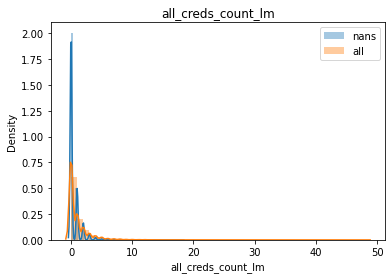

In [5]:
sns.distplot(df_nan_bad['all_creds_count_lm'], label='nans')
sns.distplot(df['all_creds_count_lm'], label='all')
plt.title('all_creds_count_lm')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

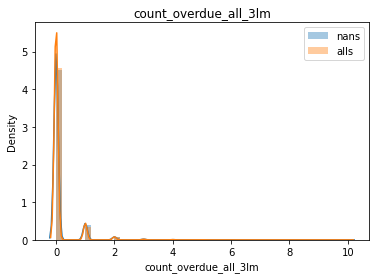

In [6]:
sns.distplot(df_nan_bad['count_overdue_all_3lm'], label='nans')
sns.distplot(df['count_overdue_all_3lm'], label='alls')
plt.title('count_overdue_all_3lm')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

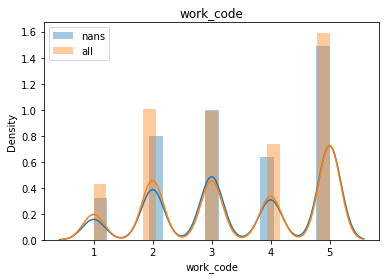

In [7]:
sns.distplot(df_nan_bad['work_code'], label='nans')
sns.distplot(df['work_code'], label='all')
plt.title('work_code')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

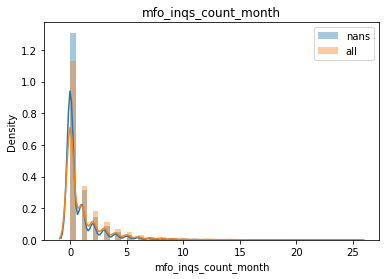

In [8]:
sns.distplot(df_nan_bad['mfo_inqs_count_month'], label='nans')
sns.distplot(df['mfo_inqs_count_month'], label='all')
plt.title('mfo_inqs_count_month')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

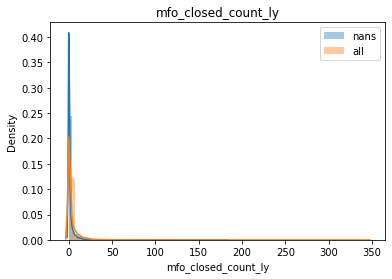

In [9]:
sns.distplot(df_nan_bad['mfo_closed_count_ly'], label='nans')
sns.distplot(df['mfo_closed_count_ly'], label='all')
plt.title('mfo_closed_count_ly')
plt.legend()
plt.show